## In this notebook, we are going to study some probability distribution functions (pdfs) and if have time, do some monte carlo simulations

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KernelDensity

import seaborn as sns
from scipy.stats import pearsonr
from scipy.stats import f_oneway
from tabulate import tabulate


In [67]:
df1 = pd.read_csv('/home/amir/Documents/GitHub/Statistics-Analysis-/pdf/5516539/Wind_Time_Series_Dataset/Wind Time Series Dataset(10min).csv')

In [68]:
df1.head(100)

,Time,WindSpeed,Power
0,2014-10-07 01:20:00,8.22,40.526173
1,2014-10-07 01:30:00,8.09,38.552540
2,2014-10-07 01:50:00,7.21,21.313683
3,2014-10-07 02:00:00,6.75,18.031418
4,2014-10-07 02:10:00,6.52,16.593281
...,...,...,...
95,2014-10-07 17:20:00,5.87,13.756508
96,2014-10-07 17:30:00,4.99,8.930560
97,2014-10-07 17:40:00,5.35,12.199876
98,2014-10-07 17:50:00,6.58,20.997047


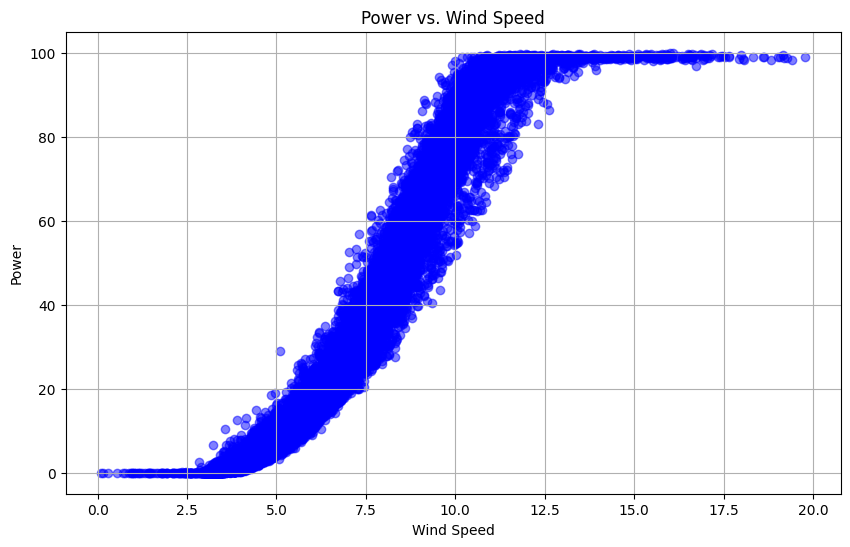

In [69]:

# Plot power vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(df1['WindSpeed'], df1['Power'], color='blue', alpha=0.5)
plt.title('Power vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.grid(True)
plt.show()


/home/amir/.local/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


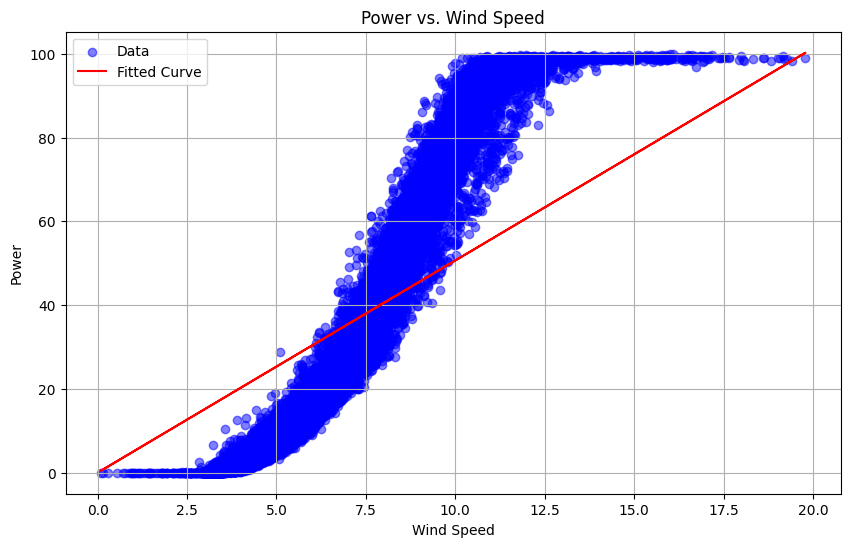

Parameters of the fitted curve (a, b): [1.23498359e+06 4.10236550e-06]


In [70]:
from scipy.optimize import curve_fit

def saturating_exponential(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit the saturating exponential function to the data
popt, pcov = curve_fit(saturating_exponential, df1['WindSpeed'], df1['Power'], maxfev=10000)

# Plot the data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(df1['WindSpeed'], df1['Power'], color='blue', alpha=0.5, label='Data')
plt.plot(df1['WindSpeed'], saturating_exponential(df1['WindSpeed'], *popt), color='red', label='Fitted Curve')
plt.title('Power vs. Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Power')
plt.legend()
plt.grid(True)
plt.show()

# Print the parameters of the fitted curve
print("Parameters of the fitted curve (a, b):", popt)


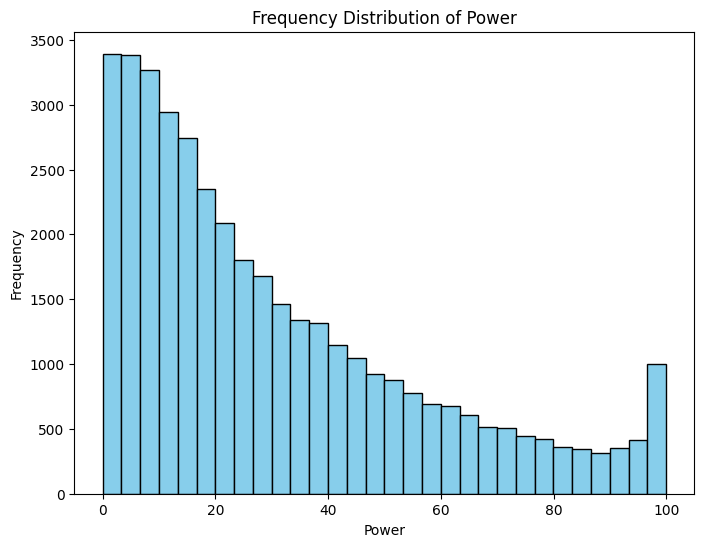

In [71]:
# Plot frequency distribution with bins
plt.figure(figsize=(8, 6))
plt.hist(df1['Power'], bins=30, color='skyblue', edgecolor='black')

plt.title('Frequency Distribution of Power')
plt.xlabel('Power')
plt.ylabel('Frequency')
plt.show()

In [41]:
print(df1.columns)


Index(['Time', 'WindSpeed', 'Power'], dtype='object')


In [42]:

df1['Time'] = pd.to_datetime(df1['Time'])


# Set 'Time' column as index
df1.set_index('Time', inplace=True)

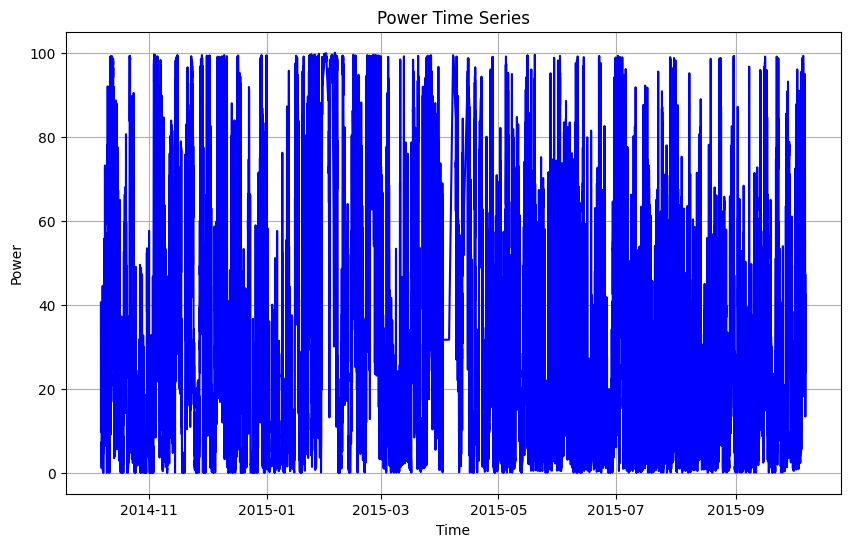

In [43]:
plt.figure(figsize=(10, 6))
plt.plot(df1.index, df1['Power'], color='blue', linestyle='-')
plt.title('Power Time Series')
plt.xlabel('Time')
plt.ylabel('Power')
plt.grid(True)
plt.show()


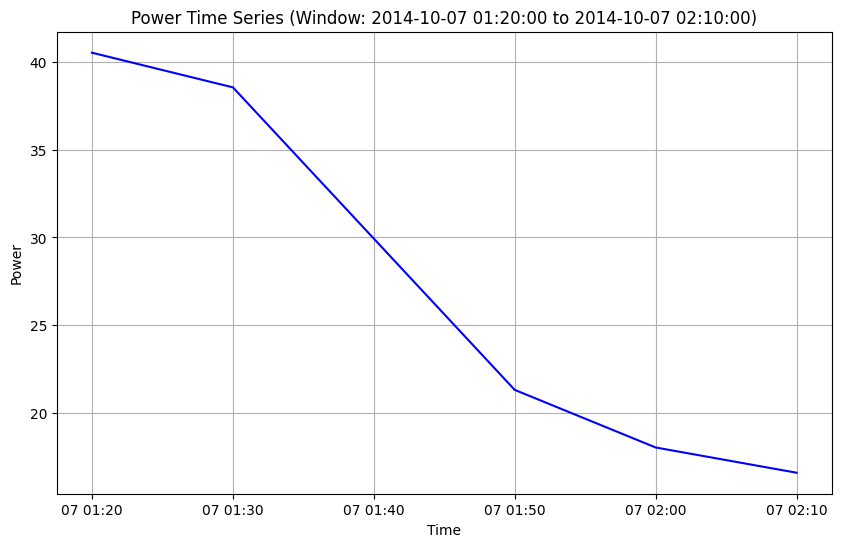

In [44]:
start_date = '2014-10-07 01:20:00'
end_date = '2014-10-07 02:10:00'

df1_window = df1.loc[start_date:end_date]

# Plot the time series for Power within the specified window
plt.figure(figsize=(10, 6))
plt.plot(df1_window.index, df1_window['Power'], color='blue', linestyle='-')
plt.title('Power Time Series (Window: {} to {})'.format(start_date, end_date))
plt.xlabel('Time')
plt.ylabel('Power')
plt.grid(True)
plt.show()

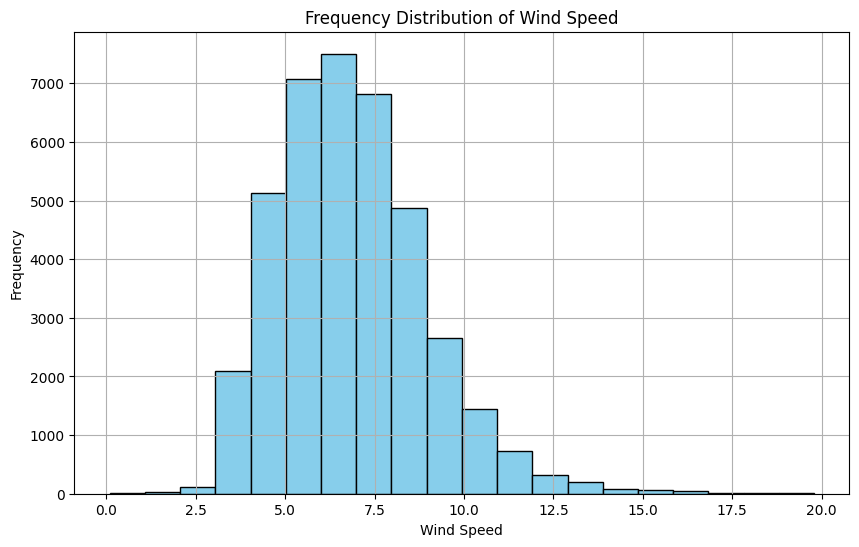

In [49]:
# Plot frequency distribution of WindSpeed
plt.figure(figsize=(10, 6))
plt.hist(df1['WindSpeed'], bins=20, color='skyblue', edgecolor='black')
plt.title('Frequency Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


The probability density function (PDF) of the gamma distribution is given by:

$$ f(x | \alpha, \beta) = \frac{1}{\beta^{\alpha}\Gamma(\alpha)} x^{\alpha - 1} e^{-\frac{x}{\beta}} $$

where:
- \( \alpha \) is the shape parameter,
- \( \beta \) is the scale parameter,
- \( \Gamma(\cdot) \) is the gamma function.


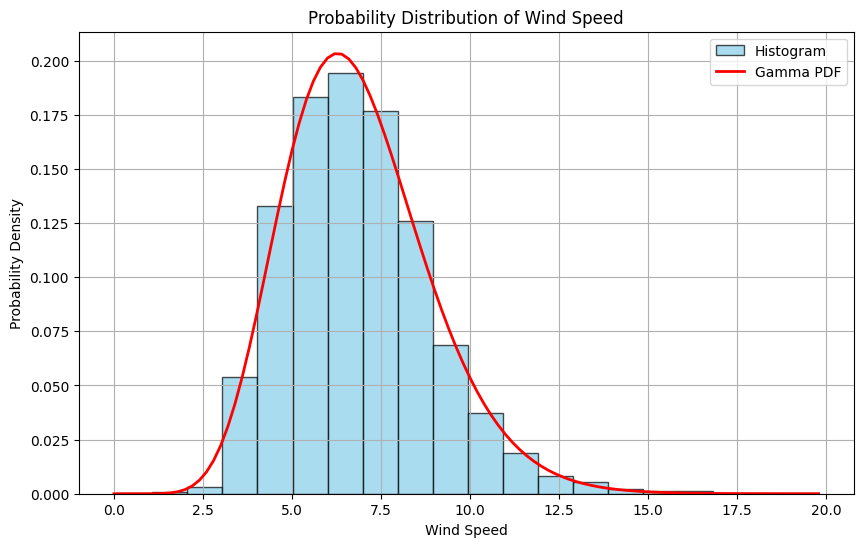

In [53]:
import scipy.stats as stats

# Fit a gamma distribution to the wind speed data
shape, loc, scale = stats.gamma.fit(df1['WindSpeed'])

# Generate x values for plotting the PDF
x = np.linspace(0, df1['WindSpeed'].max(), 100)

# Calculate the PDF using the fitted parameters
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)

# Plot the frequency distribution of WindSpeed
plt.figure(figsize=(10, 6))
plt.hist(df1['WindSpeed'], bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Gamma PDF')
plt.title('Probability Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


Shape parameter (alpha): 12.065666071588389
Scale parameter (beta): 0.5852331918760245


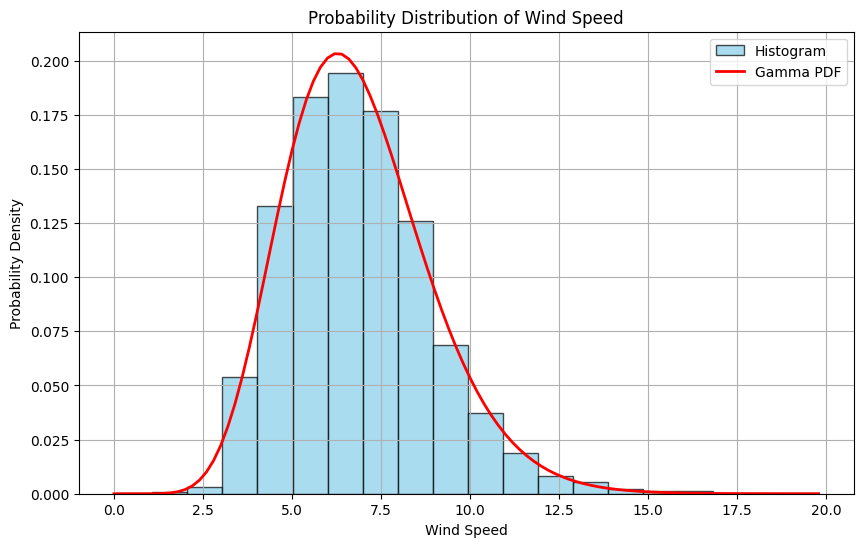

In [56]:
import scipy.stats as stats

# Fit a gamma distribution to the wind speed data
shape, loc, scale = stats.gamma.fit(df1['WindSpeed'])

# Print the values of shape and scale parameters
print("Shape parameter (alpha):", shape)
print("Scale parameter (beta):", scale)

# Generate x values for plotting the PDF
x = np.linspace(0, df1['WindSpeed'].max(), 100)

# Calculate the PDF using the fitted parameters
pdf = stats.gamma.pdf(x, shape, loc=loc, scale=scale)

# Plot the frequency distribution of WindSpeed
plt.figure(figsize=(10, 6))
plt.hist(df1['WindSpeed'], bins=20, density=True, color='skyblue', edgecolor='black', alpha=0.7, label='Histogram')
plt.plot(x, pdf, 'r-', lw=2, label='Gamma PDF')
plt.title('Probability Distribution of Wind Speed')
plt.xlabel('Wind Speed')
plt.ylabel('Probability Density')
plt.legend()
plt.grid(True)
plt.show()


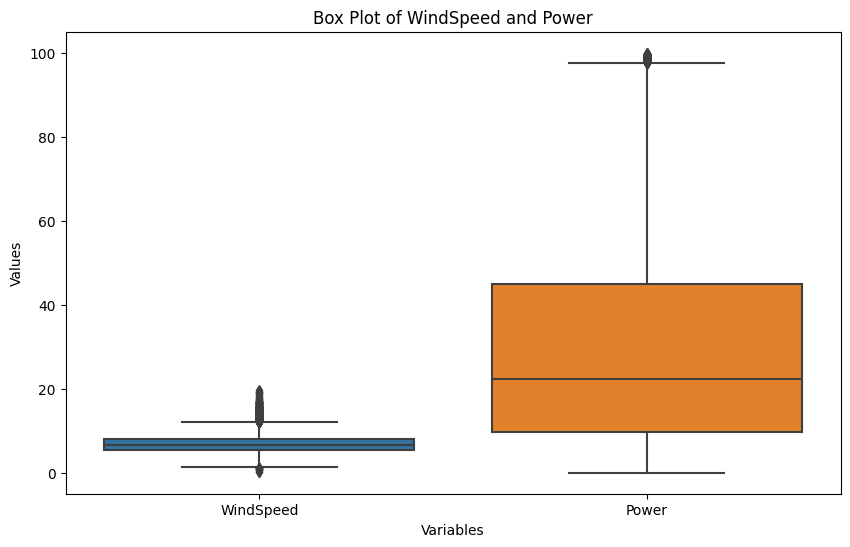

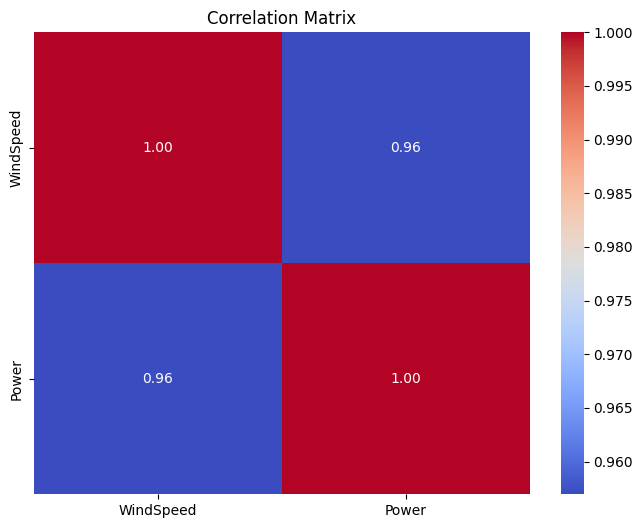

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.boxplot(data=df1[['WindSpeed', 'Power']])
plt.title('Box Plot of WindSpeed and Power')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

# Correlation matrix
correlation_matrix = df1[['WindSpeed', 'Power']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


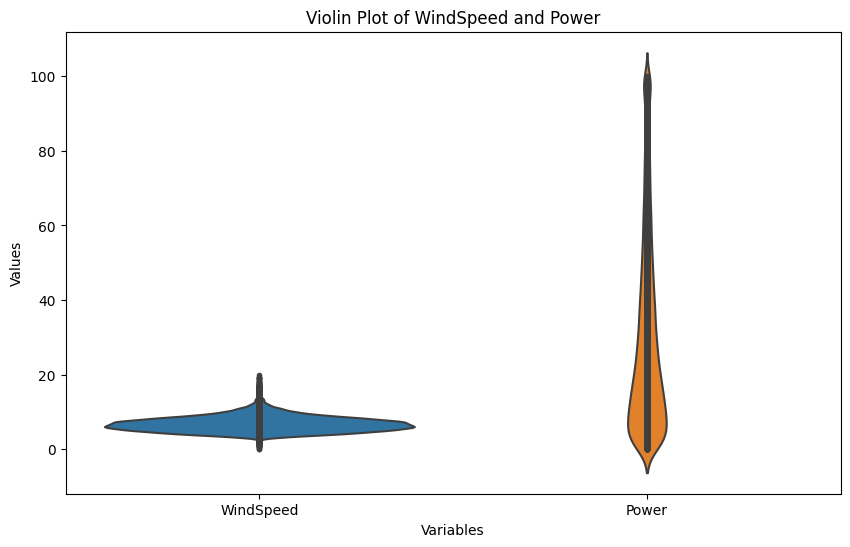

In [79]:

plt.figure(figsize=(10, 6))
sns.violinplot(data=df1[['WindSpeed', 'Power']], inner="points")
plt.title('Violin Plot of WindSpeed and Power')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()
